<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%203/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Import Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from google.colab import files


In [47]:
# Upload dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"File yang diunggah: {filename}")

# Load dataset
df = pd.read_csv(filename)
print("Dataframe Head:")
print(df.head())

Saving income.csv to income (3).csv
File yang diunggah: income (3).csv
Dataframe Head:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174          

In [48]:
# Preprocessing: Encoding categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

target_column = 'income'
X = df.drop(columns=[target_column])
y = df[target_column]

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

# Model 2: Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)


In [50]:
# Evaluation Metrics for Multiclass
def evaluate_model(y_test, y_pred, y_prob, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}, AUC-ROC: {auc:.4f}\n")
    return acc, prec, rec, f1, auc



k-NN Metrics:
Accuracy: 0.5103, Precision: 0.3950, Recall: 0.3665, F1 Score: 0.3672, AUC-ROC: 0.6811

Decision Tree Metrics:
Accuracy: 0.4711, Precision: 0.3907, Recall: 0.3904, F1 Score: 0.3904, AUC-ROC: 0.5938



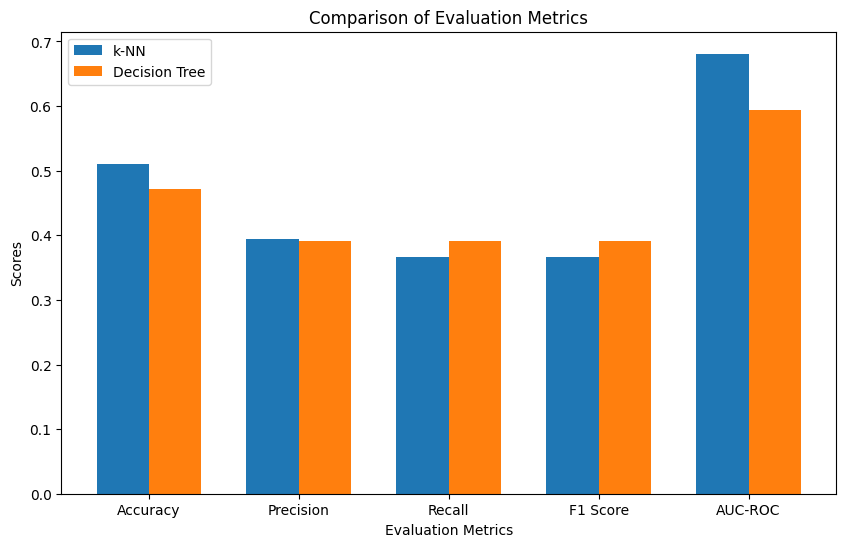

In [51]:
# Evaluasi kedua model
metrics_knn = evaluate_model(y_test, y_pred_knn, y_prob_knn, "k-NN")
metrics_dt = evaluate_model(y_test, y_pred_dt, y_prob_dt, "Decision Tree")

# Membandingkan hasil dalam bentuk grafik
metrics_labels = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC"]
knn_scores = list(metrics_knn)
dt_scores = list(metrics_dt)

x = np.arange(len(metrics_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, knn_scores, width, label='k-NN')
bars2 = ax.bar(x + width/2, dt_scores, width, label='Decision Tree')

ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Evaluation Metrics")
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels)
ax.legend()

plt.show()

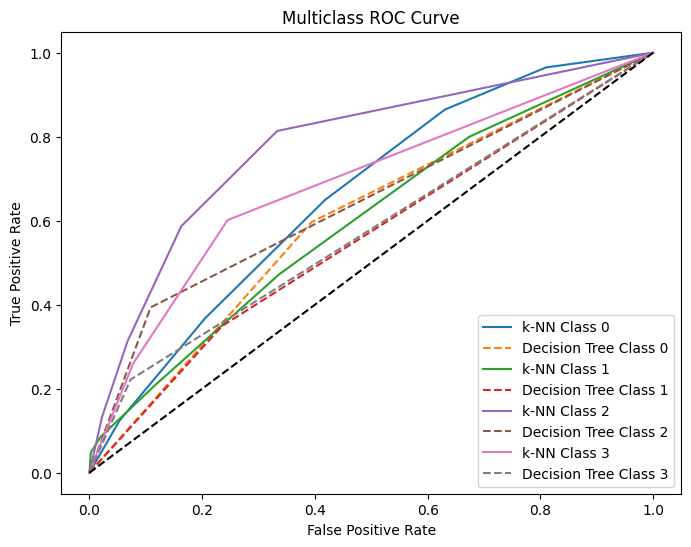

In [52]:
# ROC Curve untuk multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_knn[:, i])
    plt.plot(fpr, tpr, label=f'k-NN Class {i}')

    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_dt[:, i])
    plt.plot(fpr, tpr, label=f'Decision Tree Class {i}', linestyle='dashed')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

In [53]:
# Kesimpulan Model Terbaik
best_model = "k-NN" if metrics_knn[-1] > metrics_dt[-1] else "Decision Tree"
print(f"Model terbaik berdasarkan AUC-ROC: {best_model}")

# Penjelasan Matematika
explanation = """
Metrik Evaluasi:
1. **Akurasi**: (TP + TN) / (TP + TN + FP + FN)
   - Mengukur sejauh mana model memprediksi dengan benar.
2. **Presisi**: TP / (TP + FP)
   - Seberapa banyak prediksi positif yang benar.
3. **Recall**: TP / (TP + FN)
   - Seberapa banyak dari total kasus positif yang berhasil diprediksi dengan benar.
4. **F1-Score**: 2 * (Precision * Recall) / (Precision + Recall)
   - Harmonic mean dari Precision dan Recall, digunakan untuk data yang tidak seimbang.
5. **AUC-ROC**: Area di bawah kurva ROC yang membandingkan TPR dan FPR.
   - Semakin tinggi AUC, semakin baik model dalam membedakan antara kelas.
"""
print(explanation)

Model terbaik berdasarkan AUC-ROC: k-NN

Metrik Evaluasi:
1. **Akurasi**: (TP + TN) / (TP + TN + FP + FN)
   - Mengukur sejauh mana model memprediksi dengan benar.
2. **Presisi**: TP / (TP + FP)
   - Seberapa banyak prediksi positif yang benar.
3. **Recall**: TP / (TP + FN)
   - Seberapa banyak dari total kasus positif yang berhasil diprediksi dengan benar.
4. **F1-Score**: 2 * (Precision * Recall) / (Precision + Recall)
   - Harmonic mean dari Precision dan Recall, digunakan untuk data yang tidak seimbang.
5. **AUC-ROC**: Area di bawah kurva ROC yang membandingkan TPR dan FPR.
   - Semakin tinggi AUC, semakin baik model dalam membedakan antara kelas.



Kesimpulan Model Terbaik:
k-NN lebih baik dalam hal Accuracy dan AUC-ROC, yang menunjukkan bahwa model ini lebih baik dalam membedakan kelas secara keseluruhan.

Decision Tree memiliki sedikit keunggulan dalam Precision, Recall, dan F1 Score, yang berarti model ini lebih seimbang dalam menangani ketidakseimbangan data antar kelas.

Namun, jika kita mempertimbangkan metrik yang paling penting untuk klasifikasi secara umum, AUC-ROC sering dianggap sebagai indikator utama karena mengukur seberapa baik model dapat membedakan antara kelas.

Oleh karena itu, k-NN lebih baik secara keseluruhan karena memiliki nilai AUC-ROC yang lebih tinggi (0.6811 dibandingkan 0.5938 pada Decision Tree).

Kesimpulan akhir:
k-NN adalah model terbaik dalam skenario ini berdasarkan hasil metrik evaluasi.